# 군집 실습

다음의 데이터는 1973년 미국에서 수집된 통계로 인구 100,000명당 범죄로 체포된 사람과 관련된 자료이다.

A data frame with 50 observations on 4 variables.

* **Murder** numeric Murder arrests (per 100,000)
* **Assault** numeric Assault arrests (per 100,000)
* **UrbanPop** numeric Percent urban population
* **Rape** numeric Rape arrests (per 100,000)

이 데이터셋을 사용하여 군집 방법 - kmeans, hierarchical, DBSCAN를 사용하여 군집 분석을 하시오.  

데이터 스케일을 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
arrests = pd.read_csv('../../data/USArrests.csv')

arrests.info()
arrests.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Name        50 non-null object
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
X = np.array(arrests[['Murder','Assault','UrbanPop','Rape']])

### 데이터 스케일 표준화

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### k-means로 데이터 군집 (k=4)

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)

y_km = km.fit_predict(X_std)
y_km

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

### 클러스터의 center값 확인

In [6]:
km.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

Text(0, 0.5, 'Assault')

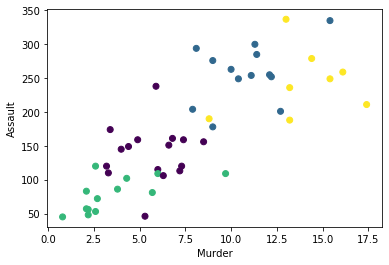

In [7]:
plt.scatter(X[:, 0],X[:,1], c=y_km)
plt.xlabel("Murder")
plt.ylabel("Assault")

In [8]:
r = pd.concat([arrests, pd.Series(y_km, name='Cluster')], axis=1)
r.head()

,Name,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


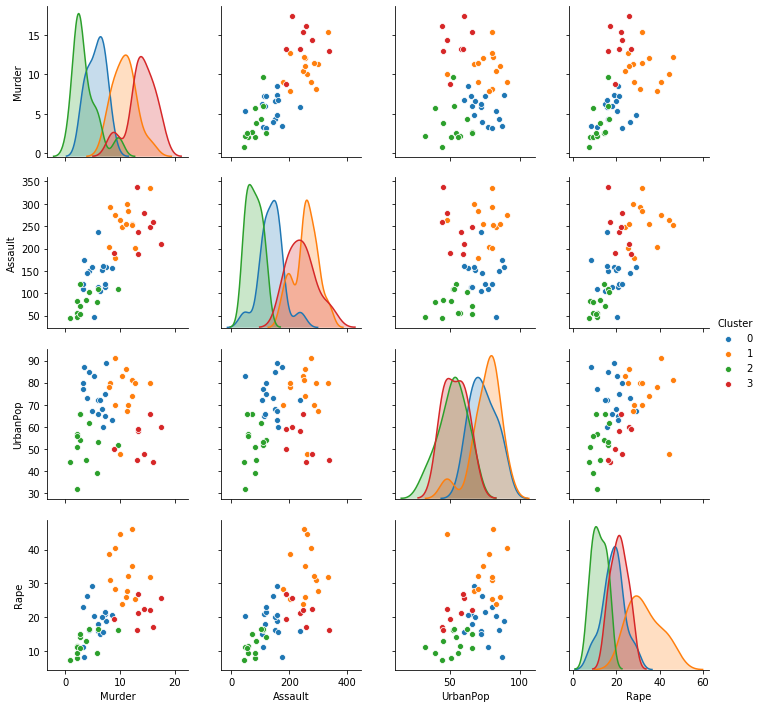

In [9]:
sns.pairplot(r, vars=['Murder','Assault','UrbanPop','Rape'], hue='Cluster')